# Problem 1 - Nonlinear Regression

Consider a classic example of throwing up a tennis ball in the air. We can predict the ball’s height (h) at any
instance of time (t) using Newton’s laws of motion (ignoring air resistance).We have got a data set (prob1data.txt) which
follows similar trajectory for training our model.

# Imports

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import os
plt.rcParams['figure.figsize'] = (10, 8)
np.random.seed(56)

# Reading data

In [2]:
data = np.loadtxt("prob1data.txt",delimiter=',')
t = data[0,:]
y = data[1,:]


# Part 1
1. Plot the training data. Write a code in Python to perform nonlinear regression on the given data. Implement
batch gradient descent algorithm for optimization. (Choose α = 0.01, number of iterations = 50000)

First we have to plot the data. 

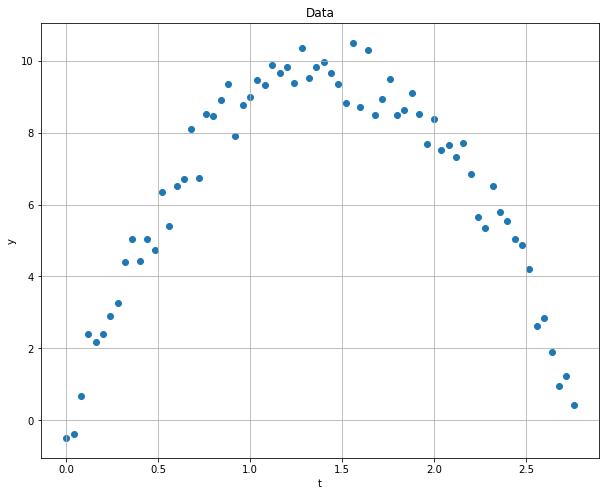

In [3]:
plt.figure()
plt.scatter(t,y)
plt.xlabel('t')
plt.ylabel('y')
plt.grid()
plt.title("Data")
plt.savefig("p11.png");

As expected the plot after visualization resembles parabola as it should be based on Newtonian physics.
Now, we want to perform non-linear regression on our data so let us define :
$$
y = w_0 + w_1t + w_2 t^2
$$

So, this is just a linear regression with variables $[1, t, t^2]$. This is the approach we'll take to solve the problem. This means that our hypothesis function is:

$$
h(w_i) = w_0 + w_1t + w_2 t^2
$$


In [4]:
#Let us define t^2 as new variable x2 and 1 as x0
t = t.reshape(-1,1)
X = np.concatenate((np.ones(t.shape),t, t**2), axis=1)
X.shape

(70, 3)

The objective of linear regression is to minimize the cost function

$$ J(w) = \frac{1}{2m} \sum_{i=1}^m \left( h_{w}(x^{(i)}) - y^{(i)}\right)^2$$

where the hypothesis $h_w(x)$ is given by the linear model
$$ h_w(x) = w^Tx +w_0 = w_1 x_1 +w_0 $$
The gradient given by:
$$
\frac{\partial J}{\partial \mathbf{w}} = \frac{1}{m} \sum_{i=1}^{m} (h_{w}(x^{(i)}) - y^{(i)}) \mathbf{x}^{(i)}\\
$$

In [5]:
def cost_function(X,y,w):
    m = y.size
    h = np.matmul(X,w)
    e = h - y
    J = np.sum( e.dot(e) )/(2*m)
    grad = (np.matmul(e,X) )/m
    return J,grad



Now, we have implemented function for cost function and gradient. Now we need to optimize w based on batch gradient descent.
The gradient descent update rule is:
$$
\begin{aligned}
w &:= w - \alpha \frac{\partial J}{\partial \mathbf{w}}\\
&:=w - \alpha \frac{1}{m} \sum_{i=1}^{m} (h_{w}(x^{(i)}) - y^{(i)}) \mathbf{x}^{(i)}
\end{aligned}
$$
We are given α = 0.01 and number of iterations = 50000

In [6]:

#Initialize w 
w = np.random.random((3))
#define alpha and no. of iterations
alpha = 0.01
n = 50000
#List to store values of J
J_bgd = []
I=[]
for i in range(n):
    j,grad = cost_function(X,y,w)
    w = w - alpha*grad
    J_bgd.append(j)
    I.append(i+1)

w    


array([-0.13575295, 14.20039582, -5.04170002])

# Part 2
Implement stochastic gradient descent for optimization of weights. Plot cost history (J) vs number of iterations
for both cases batch gradient descent and stochastic gradient descent. Comment on the difference, if any.

Now , we need to implement Stochastic Gradient descent:
First, we need to initialize w.

In [7]:
w_sgd = np.random.random((3))
J_sgd=[]
m = y.size
for i in range(n):
    j=0
    k= np.random.randint(m)
    x1 = X[k,:]
    y1 = np.array([y[k]])
    h = np.matmul(x1,w_sgd)
    e = h - y1
    j += e**2/(2*m)
    grad = e*x1
    w_sgd = w_sgd - alpha*grad
    J_sgd.append(j)

w_sgd

array([-0.1622881 , 14.16642067, -4.98833736])

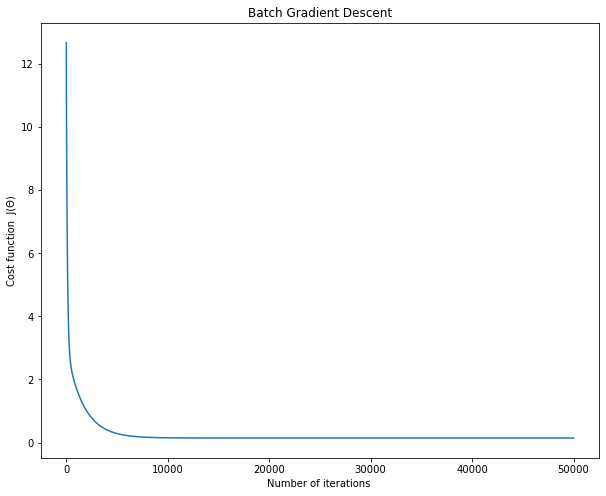

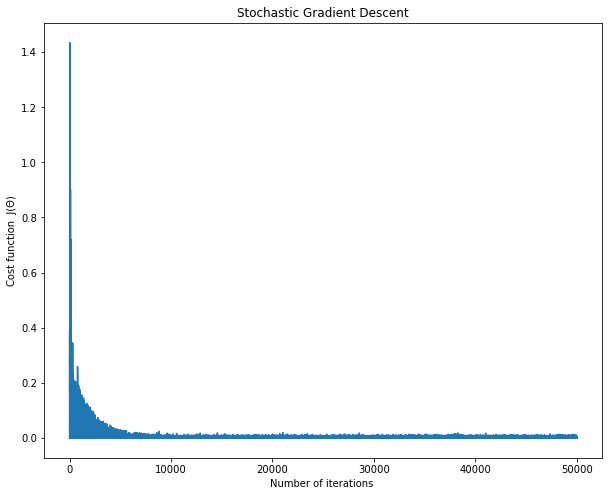

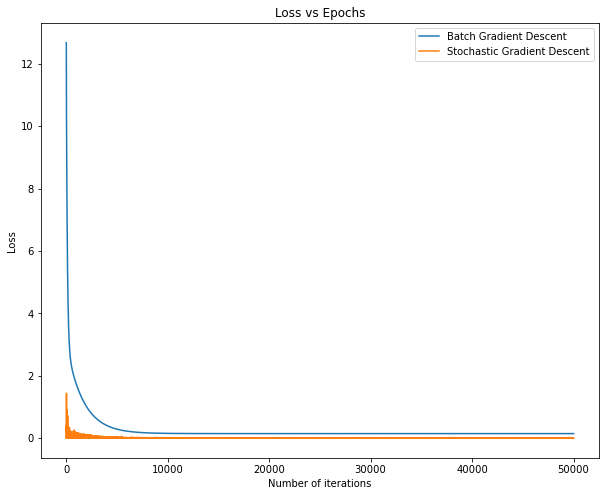

In [8]:
#plot for Batch Gradient Descent
plt.figure()
plt.plot(I,J_bgd)
plt.xlabel("Number of iterations ")
plt.ylabel("Cost function  J(Θ)")
plt.title("Batch Gradient Descent")
plt.savefig("p12.png");

#plot for Stochastic Gradient Descent
plt.figure()
plt.plot(I,J_sgd)
plt.xlabel("Number of iterations ")
plt.ylabel("Cost function  J(Θ)")
plt.title("Stochastic Gradient Descent")
plt.savefig("p13.png");

#plot of Batch Gradient Descent and Stochastic Gradient Descent
fig, ax = plt.subplots(figsize = (10, 8))
ax.plot(I, J_bgd, label="Batch Gradient Descent")
ax.plot(I, J_sgd, label="Stochastic Gradient Descent")
ax.set_xlabel("Number of iterations")
ax.set_ylabel("Loss")
ax.set_title("Loss vs Epochs")
ax.legend()
plt.savefig("p14.png");

# Part 3
Plot the cost history (J) vs number of iterations for different learning rates (α = 0.1, 0.5, 0.01, 0.05). Write
your inferences from the plot.

C:\Users\Mohit Garg\AppData\Local\Temp\ipykernel_52656\1390279150.py:6: RuntimeWarning: overflow encountered in matmul
  grad = (np.matmul(e,X) )/m
C:\Users\Mohit Garg\AppData\Local\Temp\ipykernel_52656\1390279150.py:3: RuntimeWarning: invalid value encountered in matmul
  h = np.matmul(X,w)
C:\Users\Mohit Garg\AppData\Local\Temp\ipykernel_52656\1390279150.py:6: RuntimeWarning: invalid value encountered in matmul
  grad = (np.matmul(e,X) )/m


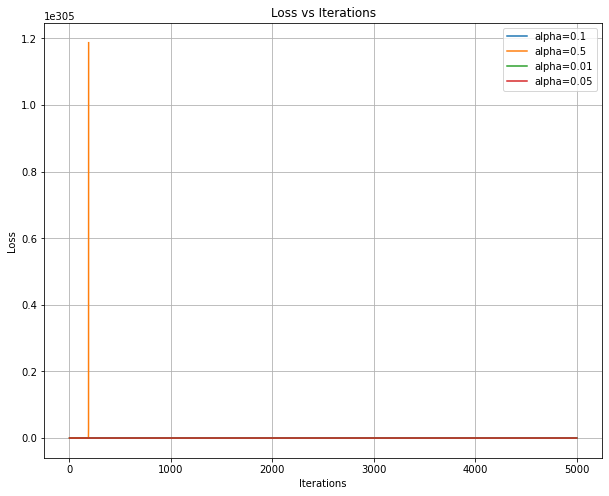

In [9]:
loss = {}
n = 5000
alpha_values = [0.1,0.5,  0.01, 0.05]
for alpha in alpha_values:
    w = [0.1 , 0.1 , 0.3]
    J2 = []
    for i in range(n):
        j,grad = cost_function(X,y,w)
        w = w - alpha*grad
        J2.append(j)
    loss[alpha] = J2
plt.figure()
for alpha in alpha_values:
    plt.plot(I[:5000], loss[alpha], label=f"alpha={alpha}")
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.title("Loss vs Iterations")
plt.grid()
plt.legend()
plt.savefig("p15.png");

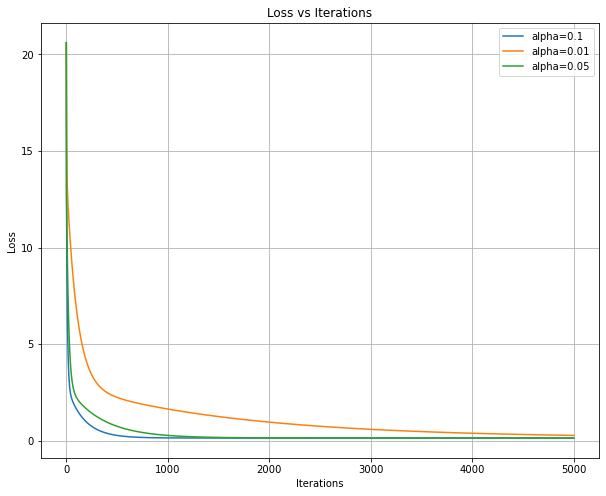

In [10]:
alpha_values = [0.1,  0.01, 0.05]
plt.figure()
for alpha in alpha_values:
    plt.plot(I[:5000], loss[alpha], label=f"alpha={alpha}")
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.title("Loss vs Iterations")
plt.grid()
plt.legend()
plt.savefig("p16.png");


# Part 4
Implement line search method (Secant method) to find learning rate (α). Optimize the weights using batch
gradient descent and plot the cost history (J) vs number of iterations for variable learning rate. Comment on
the difference between implementing line search method and choosing arbitrary α.

# Secant method
If we assume that at a given point we want to optimize$$
\phi(\alpha) = J(\mathbf{w} - \alpha \nabla J)
$$ then by secant method 
$$\alpha_{k+1} = \alpha_k - \phi'(\alpha_k)\frac{\alpha_k - \alpha_{k-1}}{\phi'(\alpha_k) - \phi'(\alpha_{k-1})}$$
Now,
$$ J(\mathbf{w} - \alpha \nabla J) = \frac{1}{2m} \sum_{i=1}^m \left(X(w-\alpha\nabla J) - y^{(i)}\right)^2$$
$$\phi'(\alpha) = \frac{1}{m} \sum_{i=1}^m \left (-X(w-\alpha\nabla J) + y^{(i)}\right) \alpha X\nabla J  $$
Note that $$gradient(w)$$
while $$error(w- \alpha \nabla J)$$

In [11]:
n = 1500
J = []
Is=[]
m = y.size
phi = []
alpha = [0.1]
np.random.seed(56)
w = np.random.random((3))
for i in range(n):
    h = np.matmul(X,w)
    e = h - y
    j = np.sum( e.dot(e) )/(2*m)
    grad = (np.matmul(e,X) )/m
    J.append(j)
    Is.append(i+1)
    w = w - alpha[-1]*grad
    if len(phi)<2:
        if len(phi)==0:
            alpha.append(0.01)
        h = np.matmul(X,w)
        phi.append((-alpha[len(phi)]/m)*np.sum((h-y).dot(np.matmul(X,grad))))
        if len(phi)==2:
            alpha.append(alpha[-1] - phi[1]*(alpha[-1] - alpha[-2])/(phi[1] - phi[0]))
    else:
        h = np.matmul(X,w)
        phi[0] = phi[1]
        phi[1] = (-alpha[-1]/m)*np.sum((h-y).dot(np.matmul(X,grad)))
        v = alpha[-1] - phi[1]*(alpha[-1] - alpha[-2])/(phi[1] - phi[0])
        if v<1e-2  :
            v = alpha[-1] + 1e-2
        if v>0.2:
            v= 0.1
        alpha.append(v)    
alpha.pop()        
print(w,J[-1])

[-0.12397675 14.17876914 -5.03449674] 0.14206623602435586


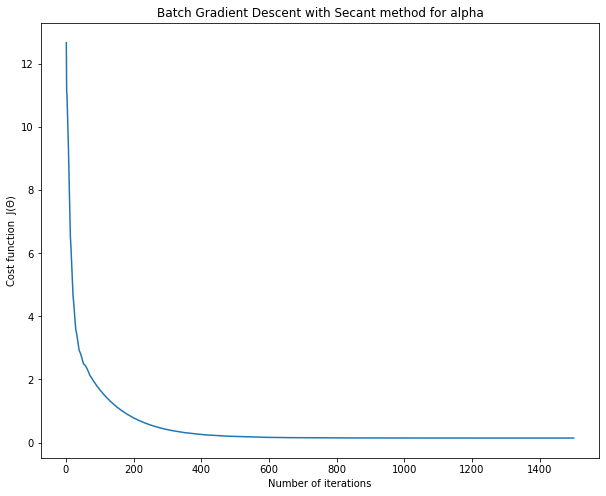

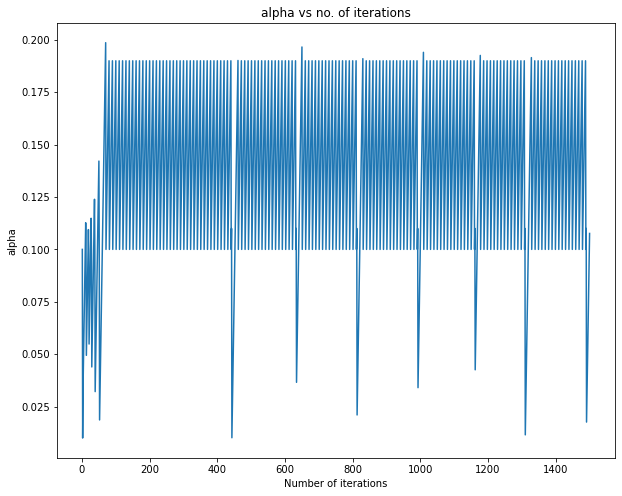

In [12]:
plt.figure()
plt.plot(Is,J)
plt.xlabel("Number of iterations")
plt.ylabel("Cost function  J(Θ)")
plt.title("Batch Gradient Descent with Secant method for alpha")
plt.savefig("p17.png");

plt.figure()
plt.plot(Is,alpha)
plt.xlabel("Number of iterations")
plt.ylabel("alpha")
plt.title("alpha vs no. of iterations")
plt.savefig("p18.png");

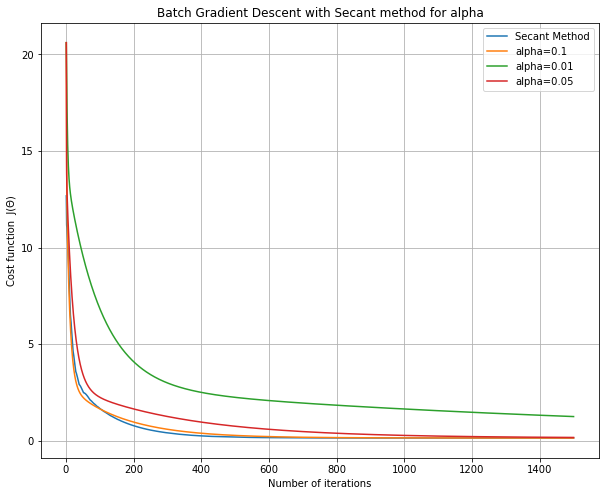

In [20]:
plt.figure()
plt.plot(Is,J,label = "Secant Method")
for alpha in alpha_values:
    plt.plot(Is, loss[alpha][:1500], label=f"alpha={alpha}")
plt.xlabel("Number of iterations")
plt.ylabel("Cost function  J(Θ)")
plt.title("Batch Gradient Descent with Secant method for alpha")
plt.grid()
plt.legend()
plt.savefig("p19.png");
